-- Notebook hecho por Felipe Serrano Salinas --
# Este notebook será para responder las siguentes preguntas.

-  ##### ¿Cómo se vieron afectados los puntajes durante la pandemia y el estallido social, considerando factores como la dificultad del acceso a las clases presenciales?
-  ##### ¿Se puede establecer un perfil de estudiante que permita explicar su desempeño en la prueba de admisión, considerando variables como el promedio de notas de enseñanza media, la situación de egreso y otras condiciones académicas o socioeconómicas?

##### Las librerias necesarias

In [39]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

##### Las preguntas serán respondidas en base el dataset hecho en la Entrega inicial del proyecto. (Guardada en la carpeta 'data').

In [40]:
df = pd.read_parquet("../data/datos_procesados.parquet")

df.head()

,id_estudiante,id_colegio_rbd,dependencia_colegio,rama_educacional,situacion_egreso,cod_region,cod_comuna,puntaje_lectora,puntaje_m1,puntaje_historia,puntaje_ciencias,tipo_ciencia,promedio_notas,puntaje_nem,year_proceso,puntaje_ranking,puntaje_m2,%_de_logro_obligatorias,prueba
0,id_001160071115,NaN,Municipal,TP comercial,Act:Nacional-Regular,1.0,201.0,469.0,457.0,437.0,426.0,None,6.3,682.0,2004,NaN,<NA>,54.47,PSU
1,id_0016900171627,NaN,Municipal,CH nocturno,Ant:Nacional-Regular,3.0,240.0,492.0,457.0,513.0,<NA>,None,5.3,481.0,2004,NaN,<NA>,55.82,PSU
2,id_0016900571641,NaN,Municipal,TP comercial,Ant:Nacional-Regular,2.0,225.0,391.0,442.0,<NA>,396.0,None,4.8,376.0,2004,NaN,<NA>,49.0,PSU
3,id_0028900472899,NaN,Municipal,CH diurno,Act:Nacional-Regular,8.0,415.0,353.0,487.0,402.0,<NA>,None,4.8,373.0,2004,NaN,<NA>,49.41,PSU
4,id_004500078456,NaN,Particular Subvencionado,CH nocturno,Act:Nacional-Regular,10.0,510.0,430.0,425.0,451.0,<NA>,None,5.4,501.0,2004,NaN,<NA>,50.29,PSU


Creare una copia del df original para cada pregunta

In [41]:
df_p1 = df.copy()
df_p2 = df.copy()

##### Empezemos a responder la pregunta número uno.

- ¿Cómo se vieron afectados los puntajes durante la pandemia y el estallido social, considerando factores como la dificultad del acceso a las clases presenciales?

##### Para responder esta pregunta debemos tener claro cuales son los periodos de tiempo de cada situacion social.

- Normal: Pre-estallido y pre-pandemia (procesos 2018–2019).
- Estallido/Inicio Pandemia: (procesos 2020–2021).
- Pandemia Severa/Post-Estallido: (procesos 2022–2023).
- Post-Pandemia/PAES: (procesos 2024–2025).

Creare una columna [`periodo_social`] para poder identificar facilmente estos periodos de tiempo.

In [ ]:
df_p1.loc[df["year_proceso"].isin([2018, 2019]), "periodo_social"] = "Normal"  #2017 - 2018
df_p1.loc[df["year_proceso"].isin([2020, 2021]), "periodo_social"] = "Estallido/Inicio Pandemia" #2019 - 2020
df_p1.loc[df["year_proceso"].isin([2022, 2023]), "periodo_social"] = "Pandemia Severa/Post-Estallido" #2021 - 2022
df_p1.loc[df["year_proceso"].isin([2024, 2025]), "periodo_social"] = "Post-Pandemia/PAES" #2023 - 2024

df_p1["periodo_social"].value_counts()

periodo_social
Post-Pandemia/PAES                617581
Normal                            552785
Pandemia Severa/Post-Estallido    548056
Estallido/Inicio Pandemia         530909
Name: count, dtype: int64

In [43]:
df_p1.columns

Index(['id_estudiante', 'id_colegio_rbd', 'dependencia_colegio',
       'rama_educacional', 'situacion_egreso', 'cod_region', 'cod_comuna',
       'puntaje_lectora', 'puntaje_m1', 'puntaje_historia', 'puntaje_ciencias',
       'tipo_ciencia', 'promedio_notas', 'puntaje_nem', 'year_proceso',
       'puntaje_ranking', 'puntaje_m2', '%_de_logro_obligatorias', 'prueba',
       'periodo_social'],
      dtype='object')

La siguente función sirve para estandarizar los datos y poder comparar los puntajes entre las distintas pruebas (PSU, PDT, PAES).

In [44]:
def estandarizar(df, columna_puntaje):
    df_temp = df.groupby('year_proceso')[columna_puntaje].agg(mean=('mean'), std=('std'))
    df_merged = df.merge(df_temp, on='year_proceso', how='left')
    df_merged[f'estandar_{columna_puntaje}'] = (df_merged[columna_puntaje] - df_merged['mean']) / df_merged['std']
    df_merged = df_merged.drop(columns=['mean', 'std'])
    return df_merged

In [45]:
df_p1 = estandarizar(df_p1, 'puntaje_m1')
df_p1 = estandarizar(df_p1, 'puntaje_m2')
df_p1 = estandarizar(df_p1, 'puntaje_lectora')
df_p1 = estandarizar(df_p1, 'puntaje_ciencias')
df_p1 = estandarizar(df_p1, 'puntaje_historia')

df_p1

,id_estudiante,id_colegio_rbd,dependencia_colegio,rama_educacional,situacion_egreso,cod_region,cod_comuna,puntaje_lectora,puntaje_m1,puntaje_historia,...,puntaje_ranking,puntaje_m2,%_de_logro_obligatorias,prueba,periodo_social,estandar_puntaje_m1,estandar_puntaje_m2,estandar_puntaje_lectora,estandar_puntaje_ciencias,estandar_puntaje_historia
0,id_001160071115,NaN,Municipal,TP comercial,Act:Nacional-Regular,1.0,201.0,469.0,457.0,437.0,...,NaN,<NA>,54.47,PSU,NaN,-0.392555,<NA>,-0.260424,-0.746874,-0.587108
1,id_0016900171627,NaN,Municipal,CH nocturno,Ant:Nacional-Regular,3.0,240.0,492.0,457.0,513.0,...,NaN,<NA>,55.82,PSU,NaN,-0.392555,<NA>,-0.071623,<NA>,0.119588
2,id_0016900571641,NaN,Municipal,TP comercial,Ant:Nacional-Regular,2.0,225.0,391.0,442.0,<NA>,...,NaN,<NA>,49.0,PSU,NaN,-0.529614,<NA>,-0.900707,-1.047548,<NA>
3,id_0028900472899,NaN,Municipal,CH diurno,Act:Nacional-Regular,8.0,415.0,353.0,487.0,402.0,...,NaN,<NA>,49.41,PSU,NaN,-0.118438,<NA>,-1.21264,<NA>,-0.91256
4,id_004500078456,NaN,Particular Subvencionado,CH nocturno,Act:Nacional-Regular,10.0,510.0,430.0,425.0,451.0,...,NaN,<NA>,50.29,PSU,NaN,-0.684947,<NA>,-0.580565,<NA>,-0.456927
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5455232,id_5995599440825,9986.0,Municipal,TP comercial,Act:Nacional-Regular,13.0,13126.0,<NA>,<NA>,<NA>,...,NaN,<NA>,<NA>,PAES,Post-Pandemia/PAES,<NA>,<NA>,<NA>,<NA>,<NA>
5455233,id_4895488246247,NaN,None,CH - reconocimiento de estudios,Act:Extranjero,NaN,NaN,605.0,700.0,542.0,...,NaN,<NA>,65.25,PAES,Post-Pandemia/PAES,0.505843,<NA>,0.078275,0.129157,0.296264
5455234,id_9866988747313,9140.0,Particular Subvencionado,CH diurno,Ant:Nacional-Regular,13.0,13122.0,746.0,589.0,<NA>,...,856.0,362,66.75,PAES,Post-Pandemia/PAES,-0.242587,-0.517674,1.278703,1.510048,<NA>
5455235,id_5866598447255,2733.0,Municipal,CH diurno,Ant:Nacional-Regular,7.0,7301.0,<NA>,<NA>,<NA>,...,631.0,<NA>,<NA>,PAES,Post-Pandemia/PAES,<NA>,<NA>,<NA>,<NA>,<NA>


In [46]:
columnas_z = [
    'estandar_puntaje_lectora', 
    'estandar_puntaje_m1', 
    'estandar_puntaje_m2',
    'estandar_puntaje_historia', 
    'estandar_puntaje_ciencias'
]

df_p1['z_puntaje_general'] = df_p1.loc[:, columnas_z].mean(axis=1)

Ya con los datos estandarizados y con una escala similar, podemos empezar a responder la pregunta

In [47]:
period_order_user = [
    'Normal',
    'Estallido/Inicio Pandemia',
    'Pandemia Severa/Post-Estallido',
    'Post-Pandemia/PAES'
]

#### Grafico Boxplot para ver la distribución de los puntajes Estandares de las pruebas.

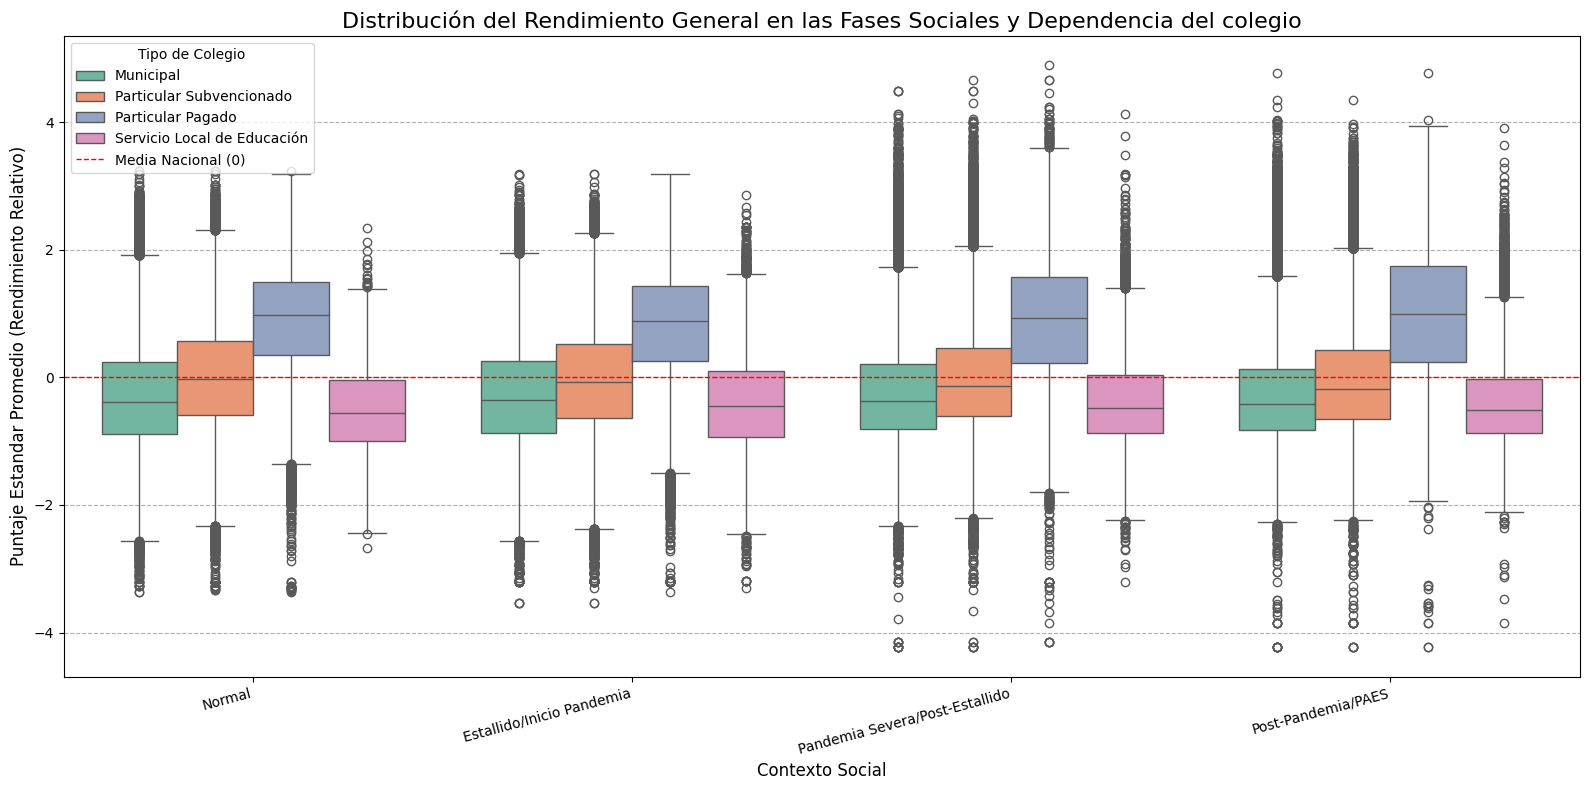

In [51]:
plt.figure(figsize=(16, 8))
sns.boxplot(
    data=df_p1,
    x='periodo_social',
    y='z_puntaje_general',
    hue='dependencia_colegio',
    order=period_order_user,
    palette='Set2'
)

plt.title('Distribución del Rendimiento General en las Fases Sociales y Dependencia del colegio', fontsize=16)
plt.xlabel('Contexto Social', fontsize=12)
plt.ylabel('Puntaje Estandar Promedio (Rendimiento Relativo)', fontsize=12)
plt.axhline(0, color='red', linestyle='--', linewidth=1, label='Media Nacional (0)')
plt.legend(title='Tipo de Colegio', loc='upper left')
plt.grid(axis='y', linestyle='--')
plt.xticks(rotation=15, ha='right')
plt.tight_layout()
plt.show()

blabla bla

#### Ahora un grafico de violin para ver la densidad de los datos.

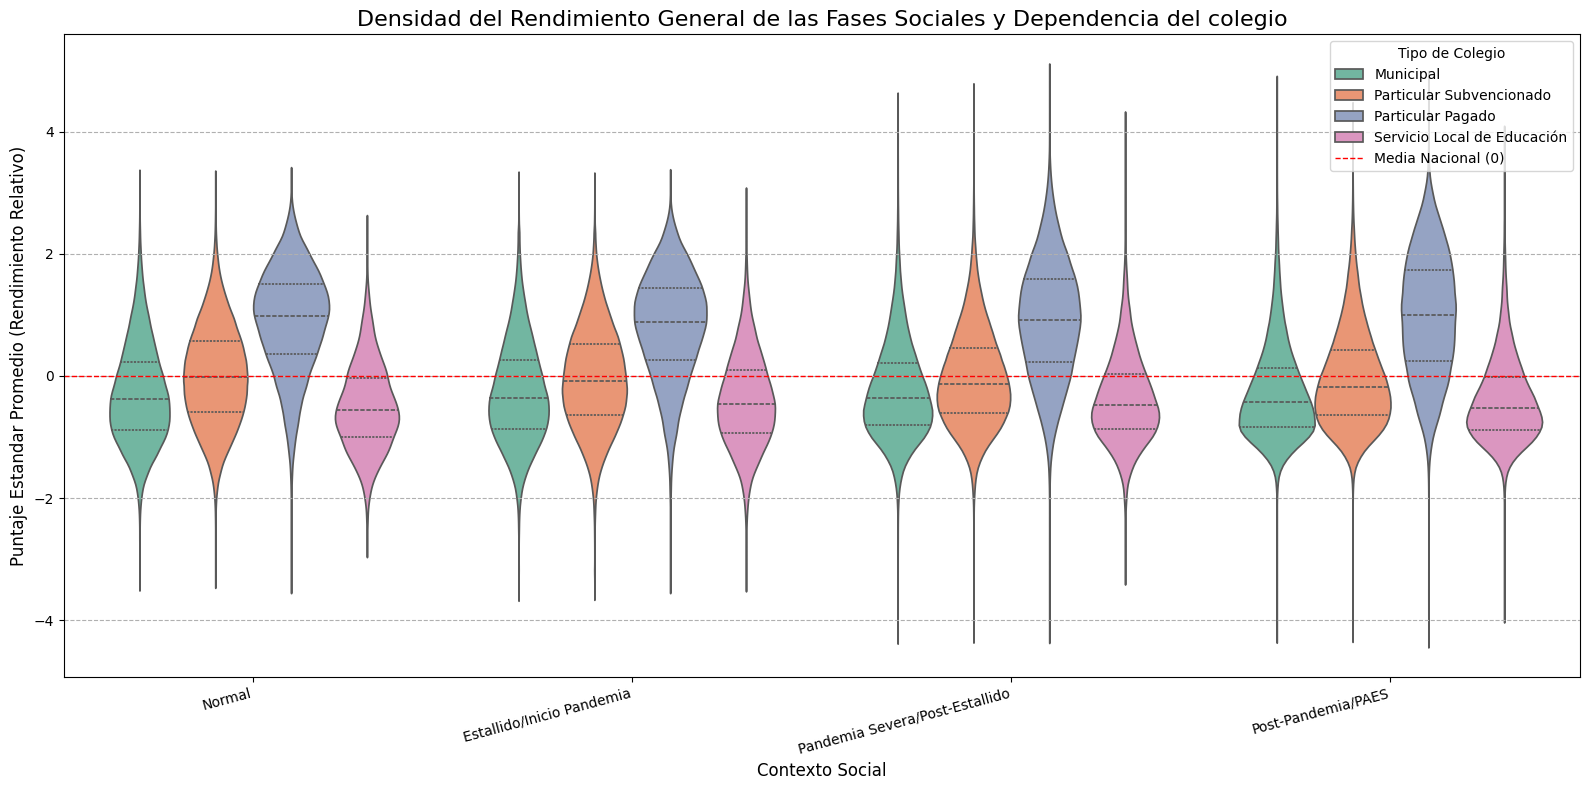

In [52]:
plt.figure(figsize=(16, 8))
sns.violinplot(
    data=df_p1,
    x='periodo_social',
    y='z_puntaje_general',
    hue='dependencia_colegio',
    order=period_order_user,
    palette='Set2',
    split=False,
    inner='quartile'
)

plt.title('Densidad del Rendimiento General de las Fases Sociales y Dependencia del colegio', fontsize=16)
plt.xlabel('Contexto Social', fontsize=12)
plt.ylabel('Puntaje Estandar Promedio (Rendimiento Relativo)', fontsize=12)
plt.axhline(0, color='red', linestyle='--', linewidth=1, label='Media Nacional (0)')
plt.legend(title='Tipo de Colegio', loc='upper right')
plt.grid(axis='y', linestyle='--')
plt.xticks(rotation=15, ha='right')
plt.tight_layout()
plt.show()

blblblblblalbla

#### Y por ultimo un grafico de barras para poder visualizar el promedio de los puntajes estandarizados.

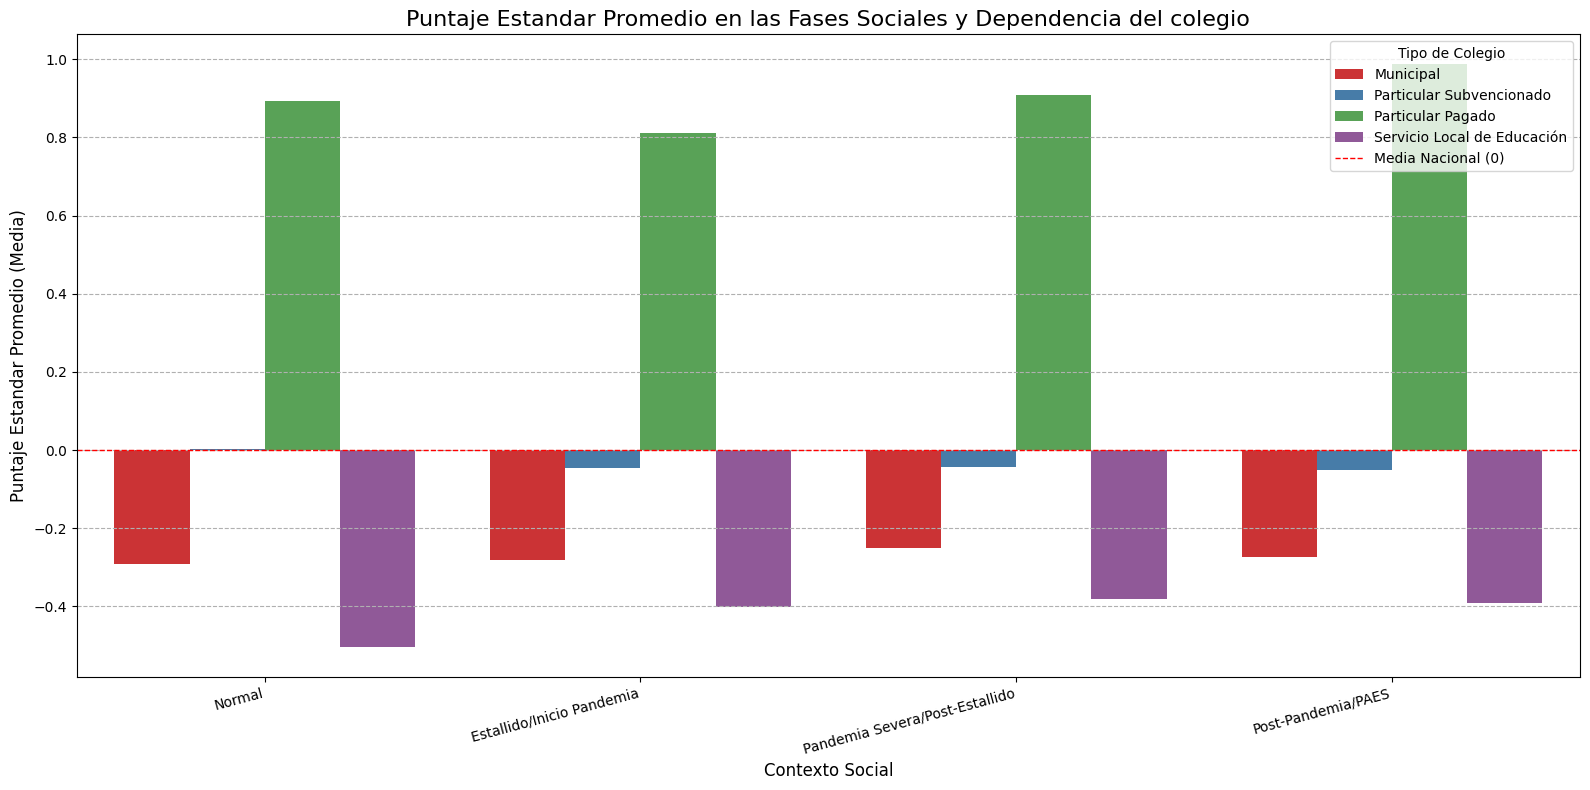

In [53]:
plt.figure(figsize=(16, 8))
sns.barplot(
    data=df_p1,
    x='periodo_social',
    y='z_puntaje_general',
    hue='dependencia_colegio',
    order=period_order_user,
    palette='Set1',
    errorbar=None
)

plt.title('Puntaje Estandar Promedio en las Fases Sociales y Dependencia del colegio', fontsize=16)
plt.xlabel('Contexto Social', fontsize=12)
plt.ylabel('Puntaje Estandar Promedio (Media)', fontsize=12)
plt.axhline(0, color='red', linestyle='--', linewidth=1, label='Media Nacional (0)')
plt.legend(title='Tipo de Colegio', loc='upper right')
plt.grid(axis='y', linestyle='--')
plt.xticks(rotation=15, ha='right')
plt.tight_layout()
plt.show()

blablabla